In [69]:
import sys
sys.path.insert(0, '/home/cameron/Projects/hypso-package')

from hypso import Hypso1

from nipals import PLS
import matplotlib.pyplot as plt
import numpy as np

import pandas as pd

from numpy import dot, zeros
from numpy import linalg
from numpy.linalg import svd, pinv

In [70]:
l1a_nc_file = '/home/cameron/Dokumenter/Data/roervik/roervik_2024-05-05_1039Z-l1a.nc'
satobj = Hypso1(path=l1a_nc_file, verbose=True)

[INFO] Loading L1a capture roervik_2024-05-05_1039Z
[INFO] Capture spatial dimensions: (598, 1092)
[INFO] Capture capture type: wide
[INFO] No georeferencing .points file provided. Skipping georeferencing.


In [71]:
datacube = satobj.l1a_cube.to_numpy()

In [72]:
x_data = datacube.reshape(datacube.shape[0]*datacube.shape[1], -1)
#x_data = x_data.T

y_data = x_data[:,100] + x_data[:,50]**2 + x_data[:,20]**3

print(x_data.shape)
print(y_data.shape)

(653016, 120)
(653016,)


In [72]:
x_df = pd.DataFrame(x_data[::6000,:] )
y_df = pd.DataFrame(y_data[::6000] )
#y_df = y_df.T
print(x_df.shape)
print(y_df.shape)

(109, 120)
(109, 1)


In [104]:
p = PLS(x_df=x_df, y_df=y_df)

p.fit(ncomp=1)


True

In [105]:
W = p.weights.to_numpy()
P = p.loadings.to_numpy()
T = p.scores.to_numpy()
Q = p.q.to_numpy()

In [106]:
W.shape

(120, 1)

In [107]:
P * W

array([[0.01065169],
       [0.01005354],
       [0.01001421],
       [0.01060799],
       [0.0104977 ],
       [0.01116088],
       [0.01079851],
       [0.01091983],
       [0.01097386],
       [0.01128546],
       [0.01140663],
       [0.01102348],
       [0.01168662],
       [0.01167895],
       [0.01165875],
       [0.01146108],
       [0.01092261],
       [0.01101538],
       [0.01064256],
       [0.01057925],
       [0.01044106],
       [0.01024239],
       [0.01067383],
       [0.01051126],
       [0.01058761],
       [0.01011396],
       [0.01037311],
       [0.01020956],
       [0.01009959],
       [0.00960819],
       [0.00960642],
       [0.00992685],
       [0.01019809],
       [0.01010364],
       [0.01011755],
       [0.01016489],
       [0.01040307],
       [0.010917  ],
       [0.01153314],
       [0.01155369],
       [0.01145276],
       [0.01220383],
       [0.01216285],
       [0.01202999],
       [0.01222025],
       [0.0121388 ],
       [0.01188783],
       [0.012

In [109]:
y_data[1500]

59597

In [ ]:
x[]

In [101]:
B = W * ((P * W)**-1) * Q

In [103]:
B.shape

(120, 5)

In [90]:
p.loadings

,PC1,PC2,PC3,PC4,PC5
0,-0.084137,-0.115680,-0.158870,0.456246,-0.093036
1,-0.085122,-0.111511,-0.173004,0.414098,-0.023915
2,-0.086075,-0.110828,-0.170080,0.387844,-0.027946
3,-0.087636,-0.113356,-0.155257,0.297901,0.002365
4,-0.089257,-0.117811,-0.126460,0.226380,-0.003643
...,...,...,...,...,...
115,-0.057731,0.160998,-0.166414,0.097885,-0.086277
116,-0.059749,0.157865,-0.170485,0.110226,-0.085406
117,-0.062561,0.153078,-0.176586,0.127248,-0.078906
118,-0.065858,0.147390,-0.182283,0.126675,-0.073085


In [78]:
type(p.b)

pandas.core.series.Series

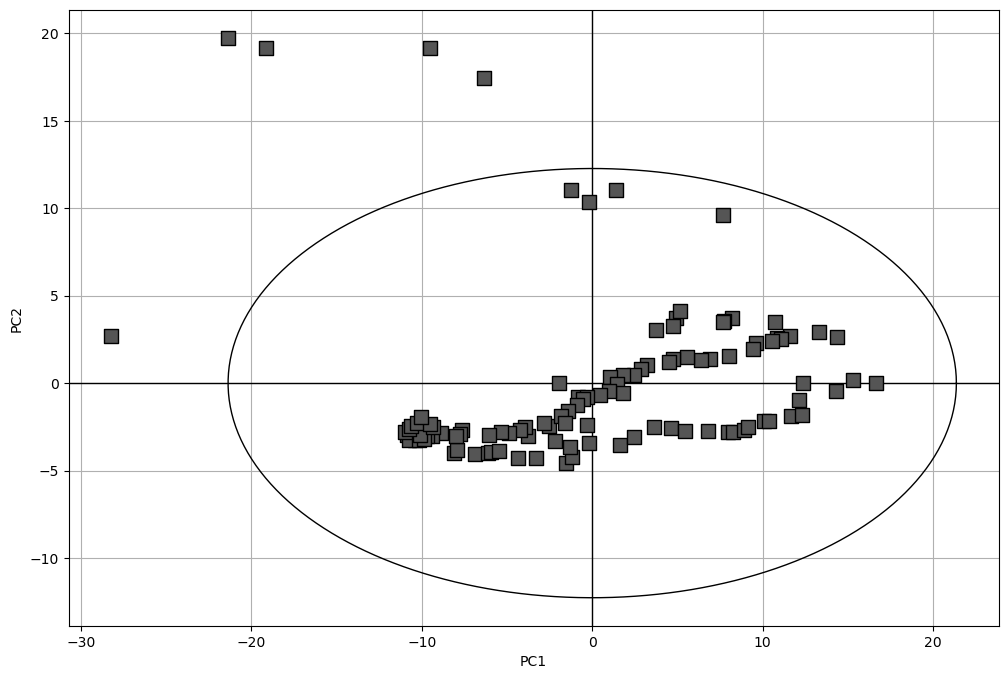

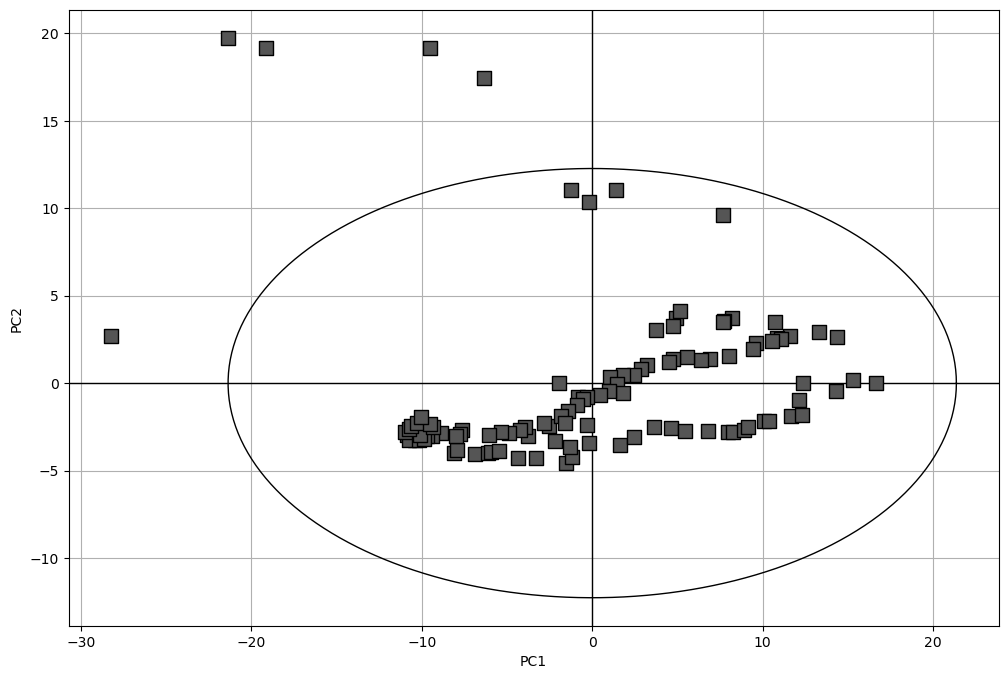

In [104]:
p.plot()

In [15]:
p.weights['PC1'].to_numpy()

array([-0.12659973, -0.11810766, -0.11634303, -0.12104596, -0.11761271,
       -0.12530065, -0.11904668, -0.12026464, -0.1208262 , -0.12395451,
       -0.12536804, -0.12149158, -0.12611848, -0.12602345, -0.12499488,
       -0.1223152 , -0.11609068, -0.1171608 , -0.11319145, -0.11188455,
       -0.1097374 , -0.10808749, -0.11195706, -0.10948366, -0.10977379,
       -0.10481946, -0.10774199, -0.10714964, -0.10224989, -0.09710163,
       -0.09711095, -0.10024697, -0.101256  , -0.0988308 , -0.09817354,
       -0.09823002, -0.09939446, -0.10166537, -0.10680453, -0.10580799,
       -0.10402189, -0.11007959, -0.10889726, -0.10682112, -0.10766488,
       -0.10667588, -0.10404629, -0.10988747, -0.1053174 , -0.10553919,
       -0.10570427, -0.1077979 , -0.10646432, -0.10329993, -0.10399883,
       -0.1006714 , -0.10079938, -0.10111028, -0.09464306, -0.09451442,
       -0.08879327, -0.08329365, -0.08641792, -0.08558708, -0.08289077,
       -0.08451023, -0.08199683, -0.08244653, -0.07971021, -0.07

In [37]:




def fit(X, Y, n_comp=1):
    """ Fit all unknown parameters, i.e.
    weights, scores, loadings (for x and y) and regression coefficients.
    Return a dict with all of the parameters.
    """
    # copy since this will contain the residuals (deflated) matrices

    deflation_mode = "regression"

    X, Y = X.copy(), Y.copy()
    if Y.ndim == 1:
        Y = Y.reshape((Y.size, 1))
    n, p = X.shape
    q = Y.shape[1]

    # normalization of data matrices
    X, muX, sigmaX = normalize_matrix(X)
    Y, muY, sigmaY = normalize_matrix(Y)
    # Residuals (deflated) matrices
    Xk, Yk = X, Y
    # Results matrices
    T, U = np.zeros((n, n_comp)), np.zeros((n, n_comp))
    W, C = np.zeros((p, n_comp)), np.zeros((q, n_comp))
    P, Q = np.zeros((p, n_comp)), np.zeros((q, n_comp))      

    # NIPALS over components
    for k in range(n_comp):
        # Weights estimation (inner loop)
        u, v = nipals_xy(X=Xk, Y=Yk)

        # compute scores
        xScore, yScore = dot(Xk, u), dot(Yk, v)
        # Deflation (in place)
        # - regress Xk's on xScore
        xLoadings = dot(Xk.T, xScore) / dot(xScore.T, xScore)
        # - substract rank-one approximations to obtain remainder matrix
        Xk -= dot(xScore, xLoadings.T)

        if deflation_mode == "canonical":
            # - regress Yk's on yScore, then substract rank-one approx.
            yLoadings = dot(Yk.T, yScore) / dot(yScore.T, yScore)
            Yk -= dot(yScore, yLoadings.T)

        if deflation_mode == "regression":
            # - regress Yk's on xScore, then substract rank-one approx.
            yLoadings = dot(Yk.T, xScore) / dot(xScore.T, xScore)
            Yk -= dot(xScore, yLoadings.T)

        # Store weights, scores and loadings 
        T[:, k] = xScore.ravel() # x-scores
        U[:, k] = yScore.ravel() # y-scores
        W[:, k] = u.ravel() # x-weights
        C[:, k] = v.ravel() # y-weights
        P[:, k] = xLoadings.ravel() # x-loadings
        Q[:, k] = yLoadings.ravel() # y-loadings
    # X = TP' + E and Y = UQ' + E

    # Rotations from input space to transformed space (scores)
    # T = X W(P'W)^-1 = XW* (W* : p x k matrix)
    # U = Y C(Q'C)^-1 = YC* (W* : q x k matrix)
    xRotations = dot(W, pinv(dot(P.T, W)))
    if Y.shape[1] > 1:
        yRotations = dot(C, pinv(dot(Q.T, C)))
    else:
        yRotations = np.ones(1)

    if True or deflation_mode == "regression":
        # Estimate regression coefficient
        # Y = TQ' + E = X W(P'W)^-1Q' + E = XB + E
        # => B = W*Q' (p x q)
        coefs = dot(xRotations, Q.T)
        coefs = 1. / sigmaX.reshape((p, 1)) * \
                coefs * sigmaY
    
    return {"mu_x": muX, "mu_y": muY, "sigma_x": sigmaX,
            "sigma_y": sigmaY, "T": T, "U":U, "W":U, 
            "C": C, "P":P, "Q":Q, "x_rotations": xRotations,
            "y_rotations": yRotations, "coefs": coefs}


def nipals_xy(X, Y, max_iter=500, tol=1e-06):
    """
    NIPALS algorithm; returns the first left and rigth singular
    vectors of X'Y.

    :param X, Y: data matrix
    :type X, Y: :class:`numpy.array`

    :param mode: possible values "PLS" (default) or "CCA" 
    :type mode: string

    :param max_iter: maximal number of iterations (default: 500)
    :type max_iter: int

    :param tol: tolerance parameter; if norm of difference
        between two successive left singular vectors is less than tol,
        iteration is stopped
    :type tol: a not negative float
            
    """
    yScore, uOld, ite = Y[:, [0]], 0, 1
    Xpinv = Ypinv = None
    # Inner loop of the Wold algo.
    while True and ite < max_iter:
        # Update u: the X weights

        # Mode PLS regress each X column on yScore
        u = dot(X.T, yScore) / dot(yScore.T, yScore)

        # Normalize u
        u /= np.sqrt(dot(u.T, u))
        # Update xScore: the X latent scores
        xScore = dot(X, u)

        # Update v: the Y weights

        # Mode PLS regress each X column on yScore
        v = dot(Y.T, xScore) / dot(xScore.T, xScore)

        # Normalize v
        v /= np.sqrt(dot(v.T, v))
        # Update yScore: the Y latent scores
        yScore = dot(Y, v)

        uDiff = u - uOld
        if dot(uDiff.T, uDiff) < tol or Y.shape[1] == 1:
            break
        uOld = u
        ite += 1
    return u, v

def normalize_matrix(X):
    """
    Normalize a matrix column-wise: subtract the means and divide by
    standard deviations. Returns the standardized matrix, sample mean
    and standard deviation

    :param X: data matrix
    :type X: :class:`numpy.array`
   
    """
    mu_x, sigma_x = np.mean(X, axis=0), np.std(X, axis=0)
    sigma_x[sigma_x == 0] = 1.
    return (X - mu_x)/sigma_x, mu_x, sigma_x

In [49]:
x = x_data[::600,:]
y = y_data[::600]

In [56]:
d = fit(X=x, Y=y)

In [57]:
d.keys()

dict_keys(['mu_x', 'mu_y', 'sigma_x', 'sigma_y', 'T', 'U', 'W', 'C', 'P', 'Q', 'x_rotations', 'y_rotations', 'coefs'])

In [67]:
d['x_rotations']

array([[-0.00852357],
       [ 0.00309808],
       [ 0.00828125],
       [ 0.01858675],
       [ 0.02432824],
       [ 0.02852706],
       [ 0.03680817],
       [ 0.04282376],
       [ 0.04674635],
       [ 0.05174328],
       [ 0.05699775],
       [ 0.06621733],
       [ 0.07169245],
       [ 0.06704581],
       [ 0.06946125],
       [ 0.06224243],
       [ 0.06002603],
       [ 0.04801209],
       [ 0.05258571],
       [ 0.04564775],
       [ 0.04491694],
       [ 0.04211192],
       [ 0.0429227 ],
       [ 0.0454209 ],
       [ 0.0446138 ],
       [ 0.0457912 ],
       [ 0.04468995],
       [ 0.05568537],
       [ 0.0592012 ],
       [ 0.05952544],
       [ 0.05944446],
       [ 0.06255076],
       [ 0.06729821],
       [ 0.06715798],
       [ 0.06801576],
       [ 0.07038136],
       [ 0.07683253],
       [ 0.07661363],
       [ 0.07220997],
       [ 0.07462494],
       [ 0.07389432],
       [ 0.07460394],
       [ 0.07644127],
       [ 0.07963344],
       [ 0.08065484],
       [ 0

In [113]:
import numpy as np

def nipals_pls(X, Y, num_components=2, tolerance=1e-6, max_iter=500):
    """
    NIPALS algorithm for PLSR
    X: Predictor matrix (n_samples, n_features)
    Y: Response matrix (n_samples, n_response)
    num_components: Number of components to compute
    tolerance: Convergence tolerance
    max_iter: Maximum number of iterations
    """

    n_samples, n_features = X.shape
    n_response = Y.shape[1]

    # Initialize arrays to store the PLS components
    X_scores = np.zeros((n_samples, num_components))
    Y_scores = np.zeros((n_samples, num_components))
    X_loadings = np.zeros((n_features, num_components))
    Y_loadings = np.zeros((n_response, num_components))

    for comp in range(num_components):
        # Initialize weights randomly or use the first Y column as a starting point
        u = Y[:, 0]
        t_old = np.zeros((n_samples,))

        for iteration in range(max_iter):
            # X weights
            w = X.T @ u
            w = w / np.linalg.norm(w)

            # X scores (latent variables)
            t = X @ w

            # Y weights
            q = Y.T @ t
            q = q / np.linalg.norm(q)

            # Y scores
            u = Y @ q

            # Convergence check
            if np.linalg.norm(t - t_old) < tolerance:
                break
            t_old = t

        print(w.shape)
        # Store the latent variables and weights
        X_scores[:, comp] = t
        Y_scores[:, comp] = u
        X_loadings[:, comp] = X.T @ t / (t.T @ t)
        Y_loadings[:, comp] = Y.T @ u / (u.T @ u)

        # Deflate X and Y
        X = X - np.outer(t, X_loadings[:, comp])
        Y = Y - np.outer(u, Y_loadings[:, comp])

    return X_scores, Y_scores, X_loadings, Y_loadings


# Example usage:
X = np.array([[1, 2, 3], [5, 10, 15], [7, 14, 21], [9, 18, 27], [11, 22, 33]])
Y = np.array([[1], [2], [3], [4], [5]])

# Call the custom PLS function
X_scores, Y_scores, X_loadings, Y_loadings = nipals_pls(X, Y, num_components=2)

print("X scores (T):\n", X_scores)
print("Y scores (U):\n", Y_scores)
print("X loadings (P):\n", X_loadings)
print("Y loadings (Q):\n", Y_loadings)


(3,)
(3,)
X scores (T):
 [[ 3.74165739         nan]
 [18.70828693         nan]
 [26.19160171         nan]
 [33.67491648         nan]
 [41.15823125         nan]]
Y scores (U):
 [[ 1. nan]
 [ 2. nan]
 [ 3. nan]
 [ 4. nan]
 [ 5. nan]]
X loadings (P):
 [[0.26726124        nan]
 [0.53452248        nan]
 [0.80178373        nan]]
Y loadings (Q):
 [[ 1. nan]]


/tmp/ipykernel_129191/4293438196.py:30: RuntimeWarning: invalid value encountered in divide
  w = w / np.linalg.norm(w)


In [130]:
import numpy as np

def nipals_pls(X, Y, num_components=2, tolerance=1e-6, max_iter=500):
    """
    NIPALS algorithm for PLSR
    X: Predictor matrix (n_samples, n_features)
    Y: Response matrix (n_samples, n_response)
    num_components: Number of components to compute
    tolerance: Convergence tolerance
    max_iter: Maximum number of iterations
    """

    n_samples, n_features = X.shape
    n_response = Y.shape[1]

    # Initialize arrays to store the PLS components
    X_scores = np.zeros((n_samples, num_components))
    Y_scores = np.zeros((n_samples, num_components))
    X_loadings = np.zeros((n_features, num_components))
    Y_loadings = np.zeros((n_response, num_components))
    X_loading_weights = np.zeros((n_features, num_components))  # To store X loading weights (W)

    for comp in range(num_components):
        # Initialize weights randomly or use the first Y column as a starting point
        u = Y[:, 0]

        t_old = np.zeros((n_samples,))

        for iteration in range(max_iter):
            # X loading weights (W) - computed as X.T @ u (weights relating X to Y)
            w = X.T @ u
            w = w / (np.linalg.norm(w) + 1e-10)  # Normalize to unit length

            # X scores (T)
            t = X @ w

            # Y weights (Q)
            q = Y.T @ t
            q = q / (np.linalg.norm(q) + 1e-10)   # Normalize to unit length

            # Y scores (U)
            u = Y @ q

            # Convergence check
            if np.linalg.norm(t - t_old) < tolerance:
                break
            t_old = t

        # Store the latent variables and weights
        X_scores[:, comp] = t
        Y_scores[:, comp] = u
        X_loadings[:, comp] = X.T @ t / (t.T @ t)
        Y_loadings[:, comp] = Y.T @ u / (u.T @ u)
        X_loading_weights[:, comp] = w  # Store X loading weights (W)

        # Deflate X and Y
        X = X - np.outer(t, X_loadings[:, comp])
        Y = Y - np.outer(u, Y_loadings[:, comp])

    return X_scores, Y_scores, X_loadings, Y_loadings, X_loading_weights


# Example usage:
X = np.array([[1, 2, 3], [5, 10, 15], [7, 14, 21], [9, 18, 27], [11, 22, 33]])
Y = np.array([[1], [2], [3], [4], [5]])

# Call the custom PLS function
X_scores, Y_scores, X_loadings, Y_loadings, X_loading_weights = nipals_pls(X, Y, num_components=2)

print("X scores (T):\n", X_scores)
print("\nY scores (U):\n", Y_scores)
print("\nX loadings (P):\n", X_loadings)
print("\nY loadings (Q):\n", Y_loadings)
print("\nX loading weights (W):\n", X_loading_weights)


W = X_loading_weights
P = X_loadings
Q = Y_loadings


X scores (T):
 [[ 3.74165739e+00 -3.67840847e-35]
 [ 1.87082869e+01 -1.82168800e-34]
 [ 2.61916017e+01 -2.94272678e-34]
 [ 3.36749165e+01 -2.24207754e-34]
 [ 4.11582313e+01 -5.88545355e-34]]

Y scores (U):
 [[ 1.00000000e+00  0.00000000e+00]
 [ 2.00000000e+00  0.00000000e+00]
 [ 3.00000000e+00  0.00000000e+00]
 [ 4.00000000e+00  0.00000000e+00]
 [ 5.00000000e+00 -4.64280422e-54]]

X loadings (P):
 [[ 2.67261242e-01 -2.84423474e+18]
 [ 5.34522484e-01 -5.68846949e+18]
 [ 8.01783726e-01 -1.22903391e+19]]

Y loadings (Q):
 [[1.00000000e+00 1.91302148e+38]]

X loading weights (W):
 [[ 2.67261242e-01 -1.57772181e-20]
 [ 5.34522484e-01 -3.15544362e-20]
 [ 8.01783726e-01 -6.31088724e-20]]


In [138]:
X_new = np.array([[6, 12, 18], [10, 20, 30]])

num_components = 5

T_new = X_new @ X_loading_weights[:, :num_components]

# Predict the response (Y_hat) using the X scores and Y loadings
Y_pred = T_new @ Y_loadings[:, :num_components].T

In [139]:
T_new

array([[ 2.24499443e+01, -1.60927625e-18],
       [ 3.74165739e+01, -2.68212708e-18]])

In [140]:
Y_pred

array([[-3.07858003e+20],
       [-5.13096672e+20]])

In [56]:
import numpy as np

def nipals_pls(X, Y, num_components=10, tolerance=1e-6, max_iter=500):
    """
    NIPALS algorithm for PLSR
    X: Predictor matrix (n_samples, n_features)
    Y: Response matrix (n_samples, n_response)
    num_components: Number of components to compute
    tolerance: Convergence tolerance
    max_iter: Maximum number of iterations
    """

    n_samples, n_features = X.shape
    n_response = Y.shape[1]

    # Initialize arrays to store the PLS components
    X_scores = np.zeros((n_samples, num_components))
    Y_scores = np.zeros((n_samples, num_components))
    X_loadings = np.zeros((n_features, num_components))
    Y_loadings = np.zeros((n_response, num_components))
    X_loading_weights = np.zeros((n_features, num_components))  # To store X loading weights (W)


    for comp in range(num_components):
        # Initialize weights randomly or use the first Y column as a starting point
        u = Y[:, 0]

        t_old = np.zeros((n_samples,))

        for iteration in range(max_iter):
            # X loading weights (W) - computed as X.T @ u (weights relating X to Y)
            w = X.T @ u
            w = w / (np.linalg.norm(w) + 1e-3) + 1e-3 # Normalize to unit length

            # X scores (T)
            t = X @ w

            # Y weights (Q)
            q = Y.T @ t
            q = q / (np.linalg.norm(q) + 1e-3) + 1e-3 # Normalize to unit length

            # Y scores (U)
            u = Y @ q

            # Convergence check
            if np.linalg.norm(t - t_old) < tolerance:
                break
            t_old = t

        # Store the latent variables and weights
        X_scores[:, comp] = t
        Y_scores[:, comp] = u
        X_loadings[:, comp] = X.T @ t / (t.T @ t)
        Y_loadings[:, comp] = Y.T @ u / (u.T @ u)
        X_loading_weights[:, comp] = w  # Store X loading weights (W)

        # Deflate X and Y
        X = X - np.outer(t, X_loadings[:, comp])
        Y = Y - np.outer(u, Y_loadings[:, comp])

    return X_scores, Y_scores, X_loadings, Y_loadings, X_loading_weights


# Example usage:
X = np.array([[1, 2, 3, 4], [5, 10, 15, 20], [7, 14, 21, 28], [9, 18, 27, 36], [11, 22, 33, 44]])
Y = np.array([[1], [2], [3], [4], [5]])

# Call the custom PLS function
X_scores, Y_scores, X_loadings, Y_loadings, X_loading_weights = nipals_pls(X, Y, num_components=10)

print("X scores (T):\n", X_scores)
print("\nY scores (U):\n", Y_scores)
print("\nX loadings (P):\n", X_loadings)
print("\nY loadings (Q):\n", Y_loadings)
print("\nX loading weights (W):\n", X_loading_weights)


W = X_loading_weights
P = X_loadings
Q = Y_loadings


X scores (T):
 [[ 5.48721745e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
              nan             nan             nan             nan
              nan             nan]
 [ 2.74360873e+01  0.00000000e+00  0.00000000e+00  0.00000000e+00
              nan             nan             nan             nan
              nan             nan]
 [ 3.84105222e+01 -6.21724894e-18  0.00000000e+00  0.00000000e+00
              nan             nan             nan             nan
              nan             nan]
 [ 4.93849571e+01  0.00000000e+00  0.00000000e+00  0.00000000e+00
              nan             nan             nan             nan
              nan             nan]
 [ 6.03593920e+01  7.10542736e-18  3.85185989e-34  0.00000000e+00
              nan             nan             nan             nan
              nan             nan]]

Y scores (U):
 [[ 1.00099852e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
              nan             nan             nan             nan
 

/tmp/ipykernel_141157/4000681855.py:53: RuntimeWarning: invalid value encountered in divide
  X_loadings[:, comp] = X.T @ t / (t.T @ t)


In [15]:
import numpy as np

def manual_plsr(X, Y, num_components=2, tolerance=1e-6, max_iter=500):
    """
    Manual PLSR using the NIPALS algorithm.
    X: Predictor matrix (n_samples, n_features)
    Y: Response matrix (n_samples, n_response)
    num_components: Number of components to compute
    tolerance: Convergence tolerance
    max_iter: Maximum number of iterations
    """
    
    n_samples, n_features = X.shape
    n_response = Y.shape[1]

    # Initialize arrays to store the PLS components
    X_scores = np.zeros((n_samples, num_components))  # T
    Y_scores = np.zeros((n_samples, num_components))  # U
    X_loadings = np.zeros((n_features, num_components))  # P
    Y_loadings = np.zeros((n_response, num_components))  # Q
    X_loading_weights = np.zeros((n_features, num_components))  # W
    regression_coefficients = np.zeros((n_features, num_components))  # B

    # NIPALS iterative process for each component
    for comp in range(num_components):
        # Use the first column of Y as initial guess for U
        u = Y[:, 0]
        t_old = np.zeros(n_samples)

        for iteration in range(max_iter):
            # Calculate X loading weights (W)
            w = X.T @ u
            w = w / np.linalg.norm(w)  # Normalize W to unit length

            # Calculate X scores (T)
            t = X @ w

            # Calculate Y loadings (Q)
            q = Y.T @ t
            q = q / np.linalg.norm(q)  # Normalize Q to unit length

            # Calculate Y scores (U)
            u = Y @ q

            # Check for convergence
            if np.linalg.norm(t - t_old) < tolerance:
                break
            t_old = t

        # Store the latent variables and weights
        X_scores[:, comp] = t
        Y_scores[:, comp] = u
        X_loading_weights[:, comp] = w
        X_loadings[:, comp] = (X.T @ t) / (t.T @ t)
        Y_loadings[:, comp] = q

        # Calculate the regression coefficients (B)

        print(q.T.shape)
        print(w.shape)
        

        regression_coefficients[:, comp] = w @ q.T

        # Deflate X and Y
        X = X - np.outer(t, X_loadings[:, comp])
        Y = Y - np.outer(u, Y_loadings[:, comp])

    return X_scores, Y_scores, X_loadings, Y_loadings, X_loading_weights, regression_coefficients


# Predict function using the fitted PLSR model
def predict_plsr(X_new, X_loading_weights, Y_loadings, num_components=2):
    """
    Predict new data using the manual PLSR model.
    X_new: New predictor data to predict response for
    X_loading_weights: Loading weights (W) from the fitted PLS model
    Y_loadings: Loadings (Q) from the fitted PLS model
    num_components: Number of components used in the model
    """
    
    # Calculate X scores (T) for the new data
    T_new = X_new @ X_loading_weights[:, :num_components]
    
    # Predict the response (Y_pred) using the X scores and Y loadings
    Y_pred = T_new @ Y_loadings[:, :num_components].T
    
    return Y_pred


# Example usage:
X = np.array([[1, 2, 3], [5, 10, 15], [7, 14, 21], [9, 18, 27], [11, 22, 33]])
Y = np.array([[1], [2], [3], [4], [5]])

# Fit the PLSR model
X_scores, Y_scores, X_loadings, Y_loadings, X_loading_weights, regression_coefficients = manual_plsr(X, Y, num_components=2)

# New data (for prediction)
X_new = np.array([[6, 12, 18], [10, 20, 30]])

# Predict the response for the new data
Y_pred = predict_plsr(X_new, X_loading_weights, Y_loadings, num_components=2)

print("Predicted Y for new data:\n", Y_pred)


(1,)
(3,)


ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 1 is different from 3)

In [108]:
def _svd_flip_1d(u, v):
    """Same as svd_flip but works on 1d arrays, and is inplace"""
    # svd_flip would force us to convert to 2d array and would also return 2d
    # arrays. We don't want that.
    biggest_abs_val_idx = np.argmax(np.abs(u))
    sign = np.sign(u[biggest_abs_val_idx])
    u *= sign
    v *= sign


def _get_first_singular_vectors_power_method(
    X, Y, mode="A", max_iter=500, tol=1e-06, norm_y_weights=False
):
    """Return the first left and right singular vectors of X'Y.

    Provides an alternative to the svd(X'Y) and uses the power method instead.
    With norm_y_weights to True and in mode A, this corresponds to the
    algorithm section 11.3 of the Wegelin's review, except this starts at the
    "update saliences" part.
    """

    eps = 1e-8
    #eps = np.finfo(X.dtype).eps
    try:
        #y_score = next(col for col in Y.T if np.any(np.abs(col) > eps))
        y_score = next(col for col in Y.T if np.any(np.abs(col) > eps))
    except StopIteration as e:
        raise StopIteration("y residual is constant") from e

    x_weights_old = 100  # init to big value for first convergence check

    for i in range(max_iter):

        x_weights = np.dot(X.T, y_score) / np.dot(y_score, y_score)

        tmp = 

        x_weights = x_weights / np.sqrt(np.dot(x_weights, x_weights)) + eps

        x_score = np.dot(X, x_weights)


        y_weights = np.dot(Y.T, x_score) / np.dot(x_score.T, x_score)

        if norm_y_weights:
            y_weights /= np.sqrt(np.dot(y_weights, y_weights)) + eps

        y_score = np.dot(Y, y_weights) / (np.dot(y_weights, y_weights) + eps)

        x_weights_diff = x_weights - x_weights_old

        if np.dot(x_weights_diff, x_weights_diff) < tol or Y.shape[1] == 1:
            break

        x_weights_old = x_weights

    n_iter = i + 1
    if n_iter == max_iter:
        print("Maximum number of iterations reached")


    return x_weights, y_weights, n_iter


def _center_scale_xy(X, Y, scale=True):
    """Center X, Y and scale if the scale parameter==True

    Returns
    -------
        X, Y, x_mean, y_mean, x_std, y_std
    """
    # center
    x_mean = X.mean(axis=0)
    X = X - x_mean
    y_mean = Y.mean(axis=0)
    Y = Y - y_mean
    # scale
    if scale:
        x_std = X.std(axis=0, ddof=1)
        x_std[x_std == 0.0] = 1.0
        X /= x_std
        y_std = Y.std(axis=0, ddof=1)
        y_std[y_std == 0.0] = 1.0
        Y /= y_std
    else:
        x_std = np.ones(X.shape[1])
        y_std = np.ones(Y.shape[1])
    return X, Y, x_mean, y_mean, x_std, y_std

In [141]:
from scipy.linalg import pinv as pinv2

n_components = 20
deflation_mode = "regression"
scale = True

X = x_data[::600, :]
y = y_data[::600].reshape(-1,1)

n = X.shape[0]
p = X.shape[1]
q = y.shape[0]

# Scale (in place)
Xk, yk, _x_mean, _y_mean, _x_std, _y_std = _center_scale_xy(
    X, y, scale
)

x_weights_ = np.zeros((p, n_components))  # U
y_weights_ = np.zeros((q, n_components))  # V
_x_scores = np.zeros((n, n_components))  # Xi
_y_scores = np.zeros((n, n_components))  # Omega
x_loadings_ = np.zeros((p, n_components))  # Gamma
y_loadings_ = np.zeros((q, n_components))  # Delta
n_iter_ = []

# This whole thing corresponds to the algorithm in section 4.1 of the
# review from Wegelin. See above for a notation mapping from code to
# paper.
#y_eps = np.finfo(yk.dtype).eps
for k in range(n_components):
    # Find first left and right singular vectors of the X.T.dot(Y)
    # cross-covariance matrix.

    # Replace columns that are all close to zero with zeros
    #yk_mask = np.all(np.abs(yk) < 10 * y_eps, axis=0)
    yk_mask = np.all(np.abs(yk) < 1e-8, axis=0)
    yk[:, yk_mask] = 0.0

    try:
        (
            x_weights,
            y_weights,
            n_iter_val,
        ) = _get_first_singular_vectors_power_method(
            Xk,
            yk,
            #mode=self.mode,
            max_iter=500,
            tol=1e-06,
        )
    except StopIteration as e:
        if str(e) != "y residual is constant":
            raise
        #warnings.warn(f"y residual is constant at iteration {k}")
        break

    n_iter_.append(n_iter_val)

    # inplace sign flip for consistency across solvers and archs
    _svd_flip_1d(x_weights, y_weights)

    # compute scores, i.e. the projections of X and Y
    x_scores = np.dot(Xk, x_weights)

    y_ss = np.dot(y_weights, y_weights)
    y_scores = np.dot(yk, y_weights) / y_ss

    # Deflation: subtract rank-one approx to obtain Xk+1 and Yk+1
    x_loadings = np.dot(x_scores, Xk) / np.dot(x_scores, x_scores)
    Xk -= np.outer(x_scores, x_loadings)

    if deflation_mode == "canonical":
        # regress Yk on y_score
        y_loadings = np.dot(y_scores, yk) / np.dot(y_scores, y_scores)
        yk -= np.outer(y_scores, y_loadings)
    if deflation_mode == "regression":
        # regress Yk on x_score
        y_loadings = np.dot(x_scores, yk) / np.dot(x_scores, x_scores)
        yk -= np.outer(x_scores, y_loadings)

    x_weights_[:, k] = x_weights
    y_weights_[:, k] = y_weights
    _x_scores[:, k] = x_scores
    _y_scores[:, k] = y_scores
    x_loadings_[:, k] = x_loadings
    y_loadings_[:, k] = y_loadings

# X was approximated as Xi . Gamma.T + X_(R+1)
# Xi . Gamma.T is a sum of n_components rank-1 matrices. X_(R+1) is
# whatever is left to fully reconstruct X, and can be 0 if X is of rank
# n_components.
# Similarly, y was approximated as Omega . Delta.T + y_(R+1)

# Compute transformation matrices (rotations_). See User Guide.
x_rotations_ = np.dot(
    x_weights_,
    pinv2(np.dot(x_loadings_.T, x_weights_), check_finite=False),
)
y_rotations_ = np.dot(
    y_weights_,
    pinv2(np.dot(y_loadings_.T, y_weights_), check_finite=False),
)
coef_ = np.dot(x_rotations_, y_loadings_.T)
coef_ = (coef_ * _y_std).T / _x_std
intercept_ = _y_mean
_n_features_out = x_rotations_.shape[1]





In [163]:
i = 30008
z = x_data[i,:]
print(y_data[i])

z = z - _x_mean
Ypred = z @ coef_.T + intercept_

print(Ypred[0])

54967
35251.20517192241
